# Regression with transformers

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('../src')) # or the path to your source code
utils_path = os.path.abspath(os.path.join('../utils')) # or the path to your source code
sys.path.insert(0, module_path)
sys.path.insert(0, utils_path)

## Define kernels

In [46]:
def gaussian(x):
    return torch.exp(-x**2 / 2)

def boxcar(x):
    return torch.abs(x) < 1

def constant(x):
    return 1.0 + 0 * x

def epanechikov(x):
    return torch.max(1 - torch.abs(x), torch.zeros_like(x))

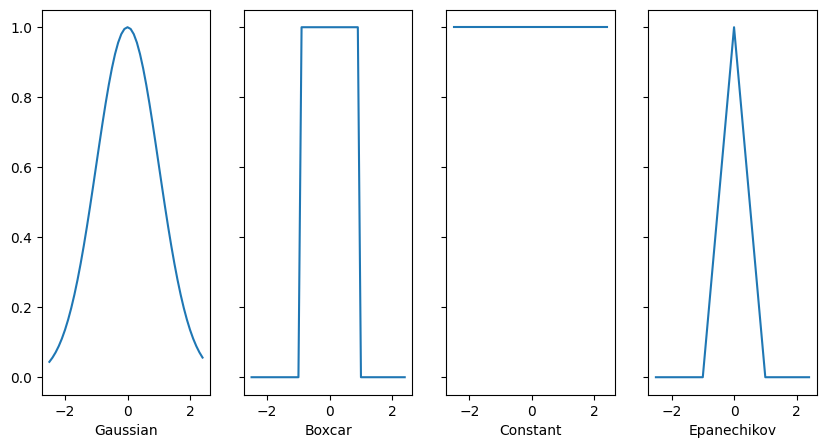

In [47]:
fig, axs = plt.subplots(1, 4, figsize=(10, 5), sharey=True)

kernels = (gaussian, boxcar, constant, epanechikov)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
x = torch.arange(-2.5, 2.5, 0.1)
for kernel, name, ax in zip(kernels, names, axs):
    ax.plot(x.detach().numpy(), kernel(x).detach().numpy())
    ax.set_xlabel(name)
plt.show()

# Generate data for function $y=2\sin(x)+x$

In [53]:
def f(x):
    return 2 * torch.sin(x) + x

n = 40 # Number of random samples
x_train, _ = torch.sort(torch.rand(n) * 5)
y_train = f(x_train) + torch.randn(n)
x_val = torch.arange(0, 5, 0.1)
y_val = f(x_val)

In [54]:
print(np.shape(x_train.reshape(1, -1)))

torch.Size([1, 40])


In [55]:
# Implement 11.2.2
def nadaraya_watson(x_train, y_train, x_val, kernel):
    dists = x_train.reshape(-1, 1) - x_val.reshape(1, -1)
    k = kernel(dists).type(torch.float32)
    attention_w = torch.exp(k)/torch.exp(k).sum(0)
    y_hat = y_train@attention_w
    return y_hat, attention_w

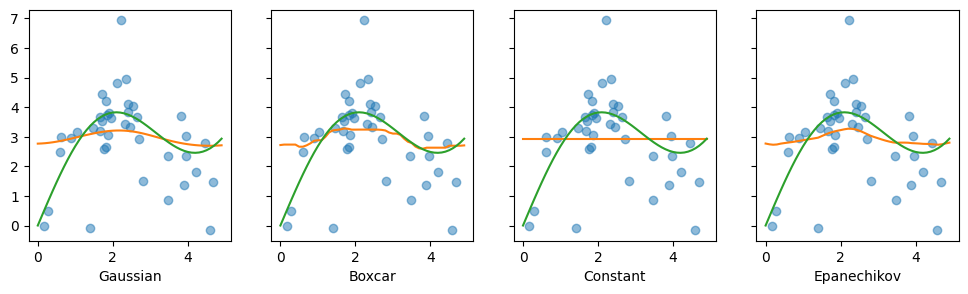

In [57]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

kernels = (gaussian, boxcar, constant, epanechikov)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
for kernel, name, ax in zip(kernels, names, axs):
    y_hat, _ = nadaraya_watson(x_train, y_train, x_val, kernel)
    ax.plot(x_train, y_train, 'o', alpha=0.5)
    ax.plot(x_val, y_hat)
    ax.plot(x_val, y_val)
    ax.set_xlabel(name)
plt.show()